# Using TensorBoard for Hyperparameter Tunnning

In [1]:
#Import the libraries:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
#Ignore the warnings:
import warnings
warnings.filterwarnings("ignore")
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

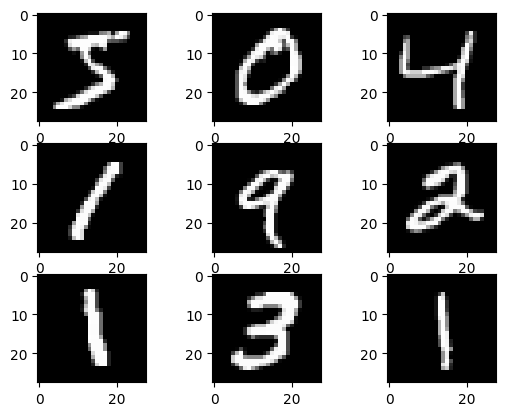

In [2]:
#Import the dataset:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_test = X_test / 255.0
X_train = X_train / 255.0

#Plot the dataset:
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()    


In [3]:
#Built the Model:
from tensorflow.keras import layers
#Create the input layer:
input_layer = layers.Input(shape=(28,28,1))
#Create the CNN Model:
model = tf.keras.Sequential([
    input_layer,
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(1, 1)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [4]:
#Compile the model:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.4588 - loss: 1.4978 - val_accuracy: 0.9256 - val_loss: 0.3202
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.8042 - loss: 0.5764 - val_accuracy: 0.9463 - val_loss: 0.2222
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.8425 - loss: 0.4771 - val_accuracy: 0.9530 - val_loss: 0.1972
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.8546 - loss: 0.4341 - val_accuracy: 0.9608 - val_loss: 0.1623
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.8690 - loss: 0.3975 - val_accuracy: 0.9617 - val_loss: 0.1557
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9548 - loss: 0.1679
The value of loss function: 0.15002593398094177.
The value of accuracy: 0.9616000056266785.


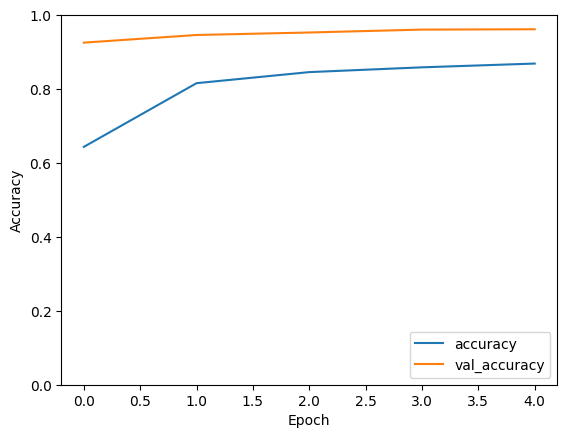

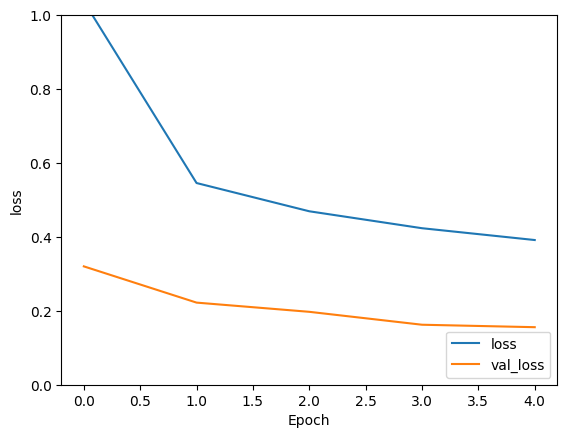

In [5]:
#Fit the model:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
#Evaluate the model:
test_loss, test_acc = model.evaluate(X_test, y_test)
#Print the evaluation metrics
print(f"The value of loss function: {test_loss}.")
print(f"The value of accuracy: {test_acc}.")
#Plot the accuracy and validation accuracy:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
#Plot the loss and val_loss:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [6]:
#Built the Model:
from tensorflow.keras import layers
#Create the input layer:
input_layer = layers.Input(shape=(28,28,1))
#Create the CNN Model:
model = tf.keras.Sequential([
    input_layer,
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(1, 1)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
#Compile the model:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [7]:
# lets create the callback function 
tensorboard_callback = TensorBoard(log_dir='./logs_class_run_02', histogram_freq=1)
 

In [8]:
#Fit the model:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[tensorboard_callback])

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - accuracy: 0.5272 - loss: 1.3100 - val_accuracy: 0.9253 - val_loss: 0.2733
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 34ms/step - accuracy: 0.8240 - loss: 0.5061 - val_accuracy: 0.9462 - val_loss: 0.1762
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.8636 - loss: 0.4064 - val_accuracy: 0.9567 - val_loss: 0.1458
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.8757 - loss: 0.3634 - val_accuracy: 0.9629 - val_loss: 0.1184
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 66ms/step - accuracy: 0.8848 - loss: 0.3272 - val_accuracy: 0.9632 - val_loss: 0.1220


## TensorBoard

In [9]:
%load_ext tensorboard

In [11]:
# Run the tensorboard of recent log here.
%tensorboard --logdir=./logs_class_run_02

Reusing TensorBoard on port 6006 (pid 8764), started 0:00:11 ago. (Use '!kill 8764' to kill it.)

## Using SGD Optimizer in the Model

In [12]:
#Built the Model:
from tensorflow.keras import layers
#Create the input layer:
input_layer = layers.Input(shape=(28,28,1))
#Create the CNN Model:
model = tf.keras.Sequential([
    input_layer,
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(1, 1)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
#Compile the model: SGD(stockistic gradient descent)
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# lets create the callback function 
tensorboard_callback = TensorBoard(log_dir='./logs/SGD', histogram_freq=1)
#Fit the model:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[tensorboard_callback])
%load_ext tensorboard

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.2637 - loss: 2.0661 - val_accuracy: 0.7605 - val_loss: 0.8460
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.6204 - loss: 1.0557 - val_accuracy: 0.8659 - val_loss: 0.5087
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.7074 - loss: 0.8139 - val_accuracy: 0.8769 - val_loss: 0.4135
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.7683 - loss: 0.6608 - val_accuracy: 0.9260 - val_loss: 0.2758
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.7977 - loss: 0.5849 - val_accuracy: 0.9331 - val_loss: 0.2448
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Hyperparamter Tunning of Optimizers 

In [18]:
#Make the two optimizers list:
optimizers = ['Adam', 'SGD']
#Train the Model:
for optimizer in optimizers:
   
   model = tf.keras.Sequential([ 
       input_layer,
       layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
       layers.MaxPooling2D(pool_size=(2, 2)),
       layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
       layers.MaxPooling2D(pool_size=(2,2)),
       layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
       layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
       layers.MaxPooling2D(pool_size=(1, 1)),
       layers.Flatten(),
       layers.Dropout(0.2),
       layers.Dense(10, activation='softmax')
    ])
   
   
   #Compile the model: SGD(stockistic gradient descent)
   model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])  

   # Create a list of batch sizes:
   batch_sizes = [16, 32, 64, 128]
   #Train the model with different batch sizes:
   for batch_size in batch_sizes:
      # Create a dataset from the training data
     log_dir = f'./logs/{optimizers}_batch_size_{batch_size}'
     tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
     #Fit the model:
     history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[tensorboard_callback])
#Load the tensorboard extention:
%load_ext tensorboard
#Start the tensorboard server:
%tensorboard --logdir ./logs
     
   
    

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.5238 - loss: 1.3646 - val_accuracy: 0.9332 - val_loss: 0.2364
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 121s 86ms/step - accuracy: 0.8419 - loss: 0.4735 - val_accuracy: 0.9513 - val_loss: 0.1665
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 78ms/step - accuracy: 0.8640 - loss: 0.4009 - val_accuracy: 0.9591 - val_loss: 0.1450
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 66ms/step - accuracy: 0.8762 - loss: 0.3605 - val_accuracy: 0.9647 - val_loss: 0.1207
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.8882 - loss: 0.3275 - val_accuracy: 0.9672 - val_loss: 0.1192
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.8938 - loss: 0.3066 - val_accuracy: 0.9705 - val_loss: 0.1075
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.8961 - loss: 0.2949 - val_accuracy: 0.9741 - val_loss: 0.0951
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9000 - loss: 0.2822 - val_acc

In [19]:
#Start the tensorboard server:
%tensorboard --logdir ./logs

Reusing TensorBoard on port 6007 (pid 11640), started 0:39:27 ago. (Use '!kill 11640' to kill it.)